In [1]:
import torch
from inference import predict_from_checkpoint
from finpak.data.fetchers.yahoo import download_multiple_tickers
from preprocessing import combine_price_series

In [2]:

tickers = [
    'AMD', 'AVGO', 'UAL'
]
start_date = '1990-01-01'
end_date = '2024-11-02'    

# Download historical data for the tickers
data_df = download_multiple_tickers(tickers, start_date, end_date)
data_df = data_df.loc[:,'Adj Close'] # Extract from multi-index dataframe

# Extract price series for all tickers and convert to tensors
price_series_list = []
for ticker in tickers:
    prices = data_df[ticker]
    price_tensor = torch.tensor(prices.to_numpy(), dtype=torch.float32)
    price_series_list.append(price_tensor)

# Combine price series
combined_prices = combine_price_series(price_series_list)

[*********************100%***********************]  3 of 3 completed


In [3]:
model_params_v0 = {
    "d_input": 3,
    "n_outputs": 2,
    "d_model": 512,
    "n_heads": 8,
    "n_layers": 64,
    "d_ff": 4096,
    # No dropout in inference
}


model_params_v1 = {
    "d_input": 3,
    "n_outputs": 2,
    "d_model": 1024,
    "n_heads": 8,
    "n_layers": 88,
    "d_ff": 8192,
    # No dropout in inference
}

model_params_v2 = {
    "d_input": 3,
    "n_outputs": 2,
    "d_model": 2048,
    "n_heads": 32,
    "n_layers": 96,
    "d_ff": 8192,
    # No dropout in inference
}

/Volumes/ExtremeSSD/repos/FINPAK/src/finpak/transformer_predictions/inference.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, m

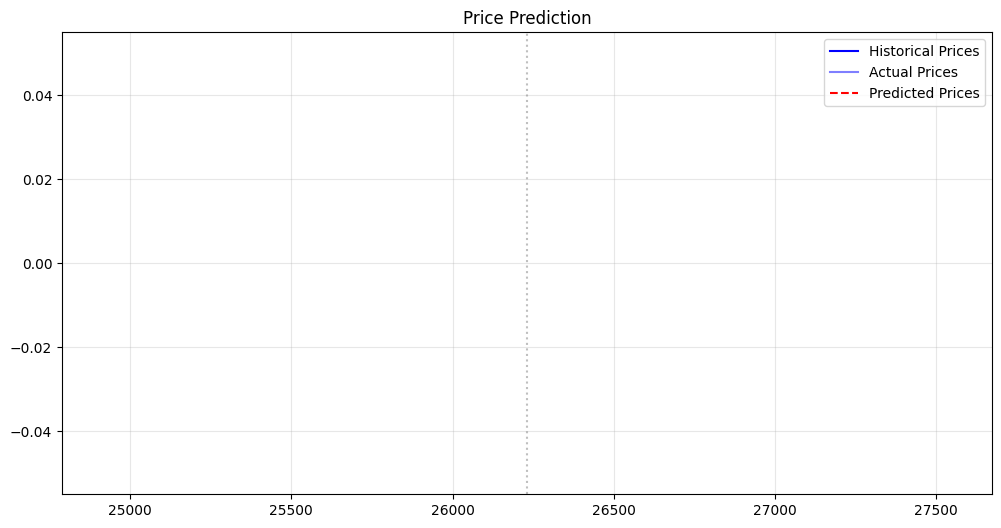

In [4]:

start_idx = len(combined_prices) - 100
n_future_steps = 30
sequence_length = 47

predict_from_checkpoint(
    checkpoint_path="checkpoints/mpv1_chkpt_e_63_valloss_0.0005451.pt",
    price_series=combined_prices,
    start_idx=start_idx,
    n_steps=n_future_steps,
    model_params=model_params_v1,
    sequence_length=sequence_length,
    return_periods=[1, 5],
    sma_periods=[20]
)